In [2]:
include("../source/spin-1_XY_ED.jl")

odlro_matrix (generic function with 1 method)

#### $ J_2 = 0 $ 

In [63]:
N = 6
J1,J3,D,h = 1.0,0.1,0.1,1.0
mz = 0
boundary = "OBC"
use_sparse = false

@time begin
    nearest_bond_list = gen_bonds_1D(N,boundary)
    third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
    basis_list = gen_basis_mz_1D(N,mz)
    println(length(basis_list2))
    basis_new1 = similar(basis_list[1])
    basis_new2 = similar(basis_list[1])
    H_XY,H_size = Ham_XY_1D(J1,J3,D,h,N,basis_list,basis_new1,basis_new2,nearest_bond_list,
                            third_nbr_bond_list,use_sparse)  
end;

5661
  0.001929 seconds (3.83 k allocations: 437.367 KiB)


In [64]:
@time energy,eigenvector = eigen(H_XY);

  0.786284 seconds (577.54 k allocations: 38.835 MiB, 2.36% gc time, 97.38% compilation time)


In [65]:
n_e = size(eigenvector)[1]
entang_entropy_list = Vector{Float64}(undef,n_e)
N_A = N_B = Int64(N/2)

@time begin
    for i in 1:n_e
        eigenstate = eigenvector[:,i]
        entang_entropy_list[i] = bipartite_entang_entropy_sym(eigenstate,basis_list,N_A,N_B)
    end
end

  0.332302 seconds (404.97 k allocations: 31.659 MiB, 2.50% gc time, 91.30% compilation time)


In [18]:
scar_entang_entropy_list = Vector{Float64}(undef,N+1)
scar_energy_list = Vector{Float64}(undef,N+1)
N_A = N_B = Int64(N/2)

@time begin
    basis_list_full = gen_basis_full_1D(N)
    for n in 0:N
        scar_state = scar_state_1D(N,n,basis_list_full)
        scar_entang_entropy_list[n+1] = bipartite_entang_entropy_full(scar_state,1,N_A,N_B)
        scar_energy_list[n+1] = (2*n-N)*h+N*D
    end
end

  0.153957 seconds (202.90 k allocations: 16.549 MiB, 3.92% gc time, 94.25% compilation time)


In [19]:
top_folder = joinpath("D:\\IACS_Project\\spin-1_XY\\data\\1D\\spin-1_XY_N=$(N)\\unperturbed\\OBC\\entanglement")
if !isdir(top_folder)
    mkdir(top_folder)
end
entang_file = joinpath(top_folder,
"entanglement_mz=$(mz)_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).jld2")
@save entang_file scar_energy=scar_energy_list scar_entanglement=scar_entang_entropy_list spectrum_energy=energy spectrum_entanglement=entang_entropy_list

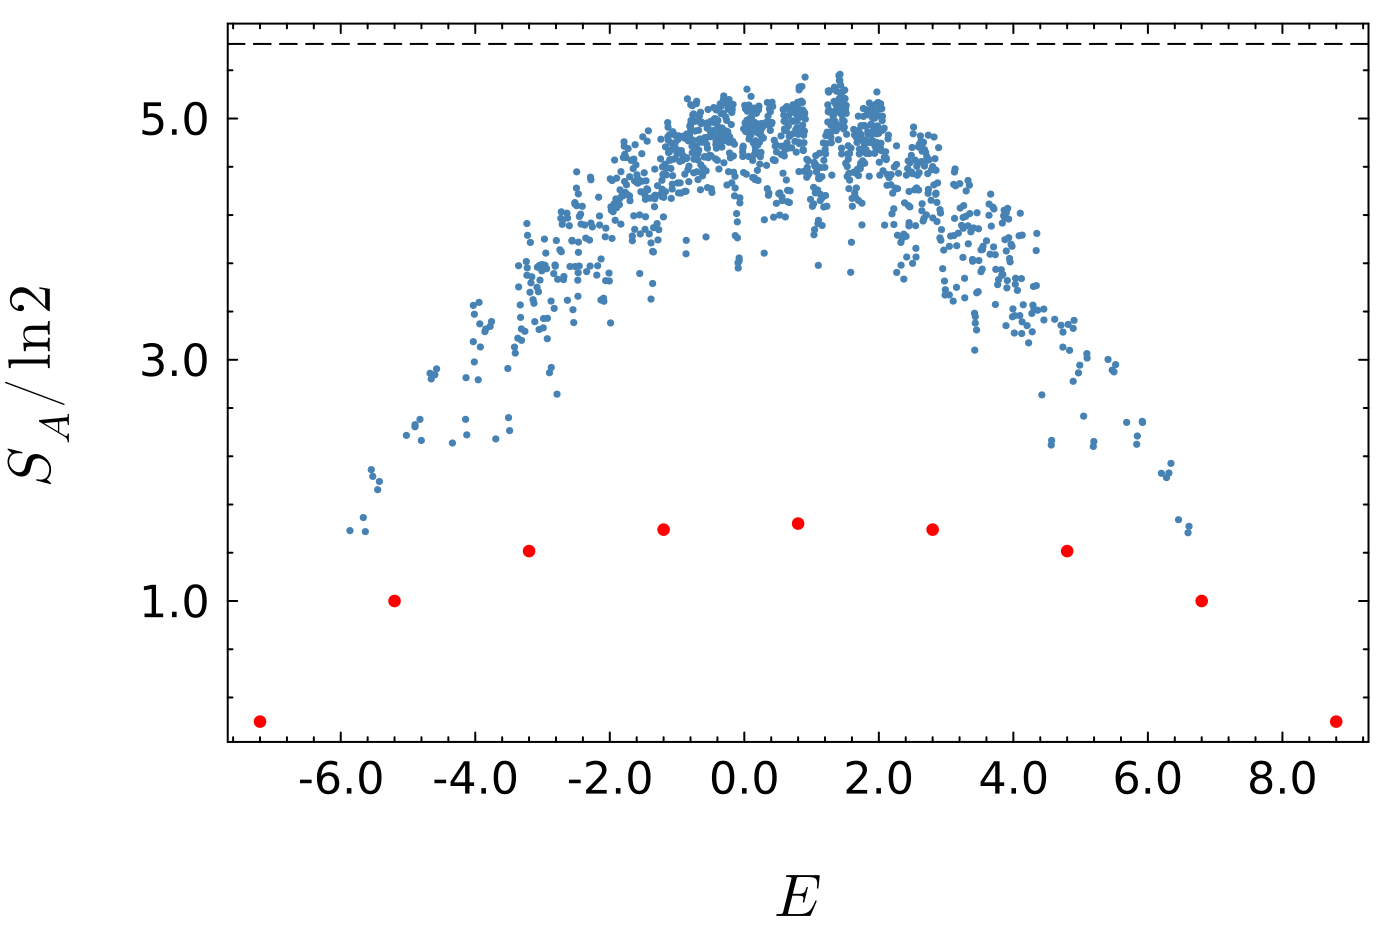

"D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=8\\unperturbed\\OBC\\Entanglement_Entropy_J1=1.0_J3=0.1_D=0.1_h=1.0.png"

In [22]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)

p = scatter(energy,(entang_entropy_list./log(2)),marker=:circle,markersize=2,color=:steelblue,markerstrokewidth=0,
            label="Eigenstates Entropy",size=plot_size,dpi=200)

scatter!(scar_energy_list,(scar_entang_entropy_list./log(2)),marker=:circle,markersize=3.5,color=:red,markerstrokewidth=0,
        label="Bimagnon States Entropy")

random_state_entropy::Float64 = (N/2)*log(3)-0.5
hline!([random_state_entropy./log(2)],color=:black,linestyle=:dash,linewidth=1,label=false)

plot!(left_margin=4mm,right_margin=2mm,top_margin=1mm,bottom_margin=4mm)
plot!(framestyle=:box)
plot!(legend=false,legend_position=(0.1,0.9),legendfontsize=9,legend_background_color=:white,
    legend_foreground_color=:black,legend_frame=true,legend_spacing=0.5,legend_columns=1)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)

xlabel!("\n\$E\$",guidefontsize=20)
ylabel!("\$S_{A}/\\ln2\$\n",guidefontsize=20)
title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16,pad=12)

x1,x_step,x2 = -6.0,2,8.0
y1,y_step,y2 = 1.0,2,5.0
xticks = (x1:x_step:x2,string.(x1:x_step:x2))
yticks = (y1:y_step:y2,string.(y1:y_step:y2))
xminor_ticks = 5 
yminor_ticks = 5
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks, yminorticks=yminor_ticks,tickfontsize=15,tick_direction=:in)
# plot!(xlims=(-8.4,8.4))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\unperturbed\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Entanglement_Entropy_J1=$(J1)_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)

#### 1) Entanglement Evolution when $ J_2 = 0 $ 

In [ ]:
N = 6
J1,J3,D,h = 1.0,0.1,0.1,1.0
boundary = "OBC"
use_sparse = false

@time begin
    nearest_bond_list = gen_bonds_1D(N,boundary)
    third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
    basis_list = gen_basis_full_1D(N)
    neel_state = nematic_neel_1D(N,basis_list)
    ferro_state = nematic_ferro_1D(N,basis_list)
    target_state = [i % 3 == 1 ? 1 : i % 3 == 2 ? 0 : -1 for i in 1:N]
    prod_state::Vector{Float64} = [basis == target_state ? 1.0 : 0.0 for basis in basis_list]
    prod_state = prod_state/norm(prod_state)
    basis_new1 = similar(basis_list[1])
    basis_new2 = similar(basis_list[1])
    H_XY,H_size = Ham_XY_1D(J1,J3,D,h,N,basis_list,basis_new1,basis_new2,nearest_bond_list,
                            third_nbr_bond_list,use_sparse)  
end;

In [ ]:
@time energy,eigenvector = eigen(H_XY);

In [ ]:
time_list = Vector{Float64}((LinRange(0,40,400)))
n_t = length(time_list)
t_step = time_list[2]-time_list[1]
evolved_neel_state_list::Vector{Vector{ComplexF64}} = Vector{Vector{ComplexF64}}(undef,n_t)
evolved_ferro_state_list::Vector{Vector{ComplexF64}} = Vector{Vector{ComplexF64}}(undef,n_t)
evolved_prod_state_list::Vector{Vector{ComplexF64}} = Vector{Vector{ComplexF64}}(undef,n_t)
exp_H::Matrix{ComplexF64} = Matrix{ComplexF64}(undef,H_size,H_size)
evolved_state::Vector{ComplexF64} = Vector{ComplexF64}(undef,H_size)
eigenvector_inv::Matrix{Float64} = inv(eigenvector)

@time begin
    for i in 1:n_t
        t = time_list[i]  
        evolved_neel_state_list[i] = copy(state_evolution(exp_H,energy,eigenvector,eigenvector_inv,t,
                                                    neel_state,evolved_state))
        evolved_ferro_state_list[i] = copy(state_evolution(exp_H,energy,eigenvector,eigenvector_inv,t,
                                                    ferro_state,evolved_state))
        evolved_prod_state_list[i] = copy(state_evolution(exp_H,energy,eigenvector,eigenvector_inv,t,
                                            prod_state,evolved_state))
    end
end;

In [ ]:
neel_state_entropy_list::Vector{Float64} = Vector{Float64}(undef,n_t)
ferro_state_entropy_list::Vector{Float64} = Vector{Float64}(undef,n_t)
prod_state_entropy_list::Vector{Float64} = Vector{Float64}(undef,n_t)
size_A = size_B = Int64(N/2)

@time begin
    for i in 1:n_t
        t_neel_state = evolved_neel_state_list[i]
        t_ferro_state = evolved_ferro_state_list[i]
        t_prod_state = evolved_prod_state_list[i]
        neel_state_entropy_list[i] = bipartite_entang_entropy(t_neel_state,1,size_A,size_B)
        prod_state_entropy_list[i] = bipartite_entang_entropy(t_prod_state,1,size_A,size_B)
        ferro_state_entropy_list[i] = bipartite_entang_entropy(t_ferro_state,1,size_A,size_B)
    end
end

In [ ]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)

p = plot(h*time_list,(neel_state_entropy_list./log(2)),marker=:circle,markercolor=:white,markerstrokecolor=:navy,markerstrokewidth=1,
        ms=2.5,lw=0.7,c=:navy,label="Nematic Néel state",size=plot_size,dpi=200)

plot!(h*time_list,(ferro_state_entropy_list./log(2)),marker=:circle,markercolor=:white,markerstrokecolor=:green,markerstrokewidth=1,
        ms=2.5,lw=0.7,c=:green,label="Nematic ferro state")

plot!(h*time_list,(prod_state_entropy_list./log(2)),marker=:circle,markercolor=:white,markerstrokecolor=:red,markerstrokewidth=1,
        ms=2.5,lw=0.7,c=:red,label="\$S_{z}\$ product state")

random_state_entropy::Float64 = (N/2)*log(3)-0.5
hline!([random_state_entropy./log(2)],color=:black,linestyle=:dash,linewidth=1,label=false)

plot!(left_margin=4mm,right_margin=1mm,top_margin=1mm,bottom_margin=2mm)
plot!(framestyle=:box)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
plot!(legend_position=(0.68,0.25),legendfontsize=12,legend_background_color=:white,
    legend_foreground_color=:black,legend_frame=true,legend_spacing=0.5,legend_columns=1)

xlabel!("\$ht\$",guidefontsize=20)
ylabel!("\$S_{A}(t)/ln2\$",guidefontsize=20)
title_text = "\$ N = $N \\quad $boundary,\\ J_{1} = $(round(J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x_max = 40
y_max = 4
xticks = (0:10:x_max,string.(0:10:x_max))
yticks = (0:1:y_max,string.(0:1:y_max))
xminor_ticks = 5 
yminor_ticks = 4
plot!(xlims=(-0.4,x_max+0.6))
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks,yminorticks=yminor_ticks,tickfontsize=15,tick_direction=:in)

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\unperturbed\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Entanglement_Evolution_J1=$(round(J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)

#### 2) Entanglement Evolution when $ J_2 \neq 0 $ 

In [ ]:
N = 6
J1,J3,D,h = 1.0,0.1,0.1,1.0
J2 = 0.2
boundary = "OBC"
use_sparse = false

@time begin
    nearest_bond_list = gen_bonds_1D(N,boundary)
    third_nbr_bond_list = gen_3rd_nbr_bonds_1D(N,boundary)
    sec_nbr_bond_list = gen_2nd_nbr_bonds_1D(N,boundary)
    basis_list = gen_basis_full_1D(N)
    ref_state = nematic_neel_1D(N,basis_list)
    basis_new1 = similar(basis_list[1])
    basis_new2 = similar(basis_list[1])
    H_XY,H_size = Ham_XY_1D(J1,J3,D,h,N,basis_list,basis_new1,basis_new2,nearest_bond_list,
                            third_nbr_bond_list,use_sparse)
    H_sec_nbr,H_size = Ham_2nd_nbr_1D(J2,N,basis_list,basis_new1,sec_nbr_bond_list,use_sparse)
    H_total = H_XY + H_sec_nbr
end;
println(H_size)

In [ ]:
@time energy,eigenvector = eigen(H_total);

In [ ]:
time_list = Vector{Float64}((LinRange(0,40,400)))
n_t = length(time_list)
t_step = time_list[2]-time_list[1]
evolved_neel_state_list::Vector{Vector{ComplexF64}} = Vector{Vector{ComplexF64}}(undef,n_t)
evolved_prod_state_list::Vector{Vector{ComplexF64}} = Vector{Vector{ComplexF64}}(undef,n_t)
evolved_ferro_state_list::Vector{Vector{ComplexF64}} = Vector{Vector{ComplexF64}}(undef,n_t)
exp_H::Matrix{ComplexF64} = Matrix{ComplexF64}(undef,H_size,H_size)
evolved_state::Vector{ComplexF64} = Vector{ComplexF64}(undef,H_size)
eigenvector_inv::Matrix{Float64} = inv(eigenvector)

@time begin
    for i in 1:n_t
        t = time_list[i]  
        evolved_neel_state_list[i] = copy(state_evolution(exp_H,energy,eigenvector,eigenvector_inv,t,
                                                    neel_state,evolved_state))
        evolved_ferro_state_list[i] = copy(state_evolution(exp_H,energy,eigenvector,eigenvector_inv,t,
                                                    ferro_state,evolved_state))
        evolved_prod_state_list[i] = copy(state_evolution(exp_H,energy,eigenvector,eigenvector_inv,t,
                                            prod_state,evolved_state))
    end
end;

In [ ]:
neel_state_entropy_list::Vector{Float64} = Vector{Float64}(undef,n_t)
ferro_state_entropy_list::Vector{Float64} = Vector{Float64}(undef,n_t)
prod_state_entropy_list::Vector{Float64} = Vector{Float64}(undef,n_t)
size_A = size_B = Int64(N/2)

@time begin
    for i in 1:n_t
        t_neel_state = evolved_neel_state_list[i]
        t_prod_state = evolved_prod_state_list[i]
        t_ferro_state = evolved_ferro_state_list[i]
        neel_state_entropy_list[i] = bipartite_entang_entropy(t_neel_state,1,size_A,size_B)
        prod_state_entropy_list[i] = bipartite_entang_entropy(t_prod_state,1,size_A,size_B)
        ferro_state_entropy_list[i] = bipartite_entang_entropy(t_ferro_state,1,size_A,size_B)
    end
end

In [ ]:
using Plots
using LaTeXStrings
using Plots.PlotMeasures
gr()

plot_size = (700,466.67)

p = plot(h*time_list,(neel_state_entropy_list./log(2)),marker=:circle,markercolor=:white,markerstrokecolor=:navy,markerstrokewidth=1,
        ms=2.5,lw=0.7,c=:navy,label="Nematic Néel state",size=plot_size,dpi=200)

plot!(h*time_list,(ferro_state_entropy_list./log(2)),marker=:circle,markercolor=:white,markerstrokecolor=:green,markerstrokewidth=1,
        ms=2.5,lw=0.7,c=:green,label="Nematic ferro state")

plot!(h*time_list,(prod_state_entropy_list./log(2)),marker=:circle,markercolor=:white,markerstrokecolor=:red,markerstrokewidth=1,
        ms=2.5,lw=0.7,c=:red,label="\$S_{z}\$ product state")

random_state_entropy::Float64 = (N/2)*log(3)-0.5
hline!([random_state_entropy./log(2)],color=:black,linestyle=:dash,linewidth=1,label=false)

plot!(left_margin=4mm,right_margin=1mm,top_margin=1mm,bottom_margin=2mm)
plot!(framestyle=:box)
plot!(grid=false,gridlinewidth=0.6,gridalpha=0.2,gridcolor=:gray)
plot!(legend_position=(0.68,0.2),legendfontsize=12,legend_background_color=:white,
    legend_foreground_color=:black,legend_frame=true,legend_spacing=0.5,legend_columns=1)

xlabel!(L"ht",guidefontsize=20)
ylabel!("\$S_{A}(t)/ln2\$",guidefontsize=20)
title_text = "\$ N = $N \\quad $boundary,\\ J_{2}/J_{1} = $(round(J2/J1,digits=6)),\\ J_{3} = $(round(J3,digits=6)), \\ D = $(round(D,digits=6)), \\ h = $(round(h,digits=6)) \$"
# title!(title_text,titlefontsize=16)

x1,x_step,x2 = 0,50,40
y1,y_step,y2 = 0.0,0.2,4
xticks = (x1:x_step:x2,string.(x1:x_step:x2))
yticks = (y1:y_step:y2,string.(y1:y_step:y2))
xminor_ticks = 5 
yminor_ticks = 2
plot!(xticks=xticks,yticks=yticks,xminorgrid=false,yminorgrid=false,
      xminorticks=xminor_ticks,yminorticks=yminor_ticks,tickfontsize=15,tick_direction=:in)
plot!(xlims=(-0.4,x2+0.6))

folder_name = "D:\\IACS_Project\\spin-1_XY\\plots\\1D\\spin-1_XY_N=$(N)\\sec_nbr_perturbed\\$(boundary)"
if !isdir(folder_name)
    mkpath(folder_name)
end

file_path = joinpath(folder_name,"Entanglement_Evolution_g=$(round(J2/J1,digits=6))_J3=$(round(J3,digits=6))_D=$(round(D,digits=6))_h=$(round(h,digits=6)).png")

display(p)
# savefig(p,file_path)